In [47]:
import numpy as np
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline
import sys
sys.path.append('/home/babyostrich/Repos/Omega500AnalysisTools/')
import omega500analysistools.IO.load_db as load_db

from astropy.cosmology import WMAP5

In [4]:
#db_dir = '/home/babyostrich/data/databases/ErwinGoogle/analysis/database/'
db_NR='/home/babyostrich/data/databases/ErwinGoogle/analysis/database/L500_NR_0.db'
db_CSF='/home/babyostrich/data/databases/ErwinGoogle/analysis/database/L500_CSF_0.db'
db_AGN='/home/babyostrich/data/databases/ErwinGoogle/analysis/database/L500_AGN_0.db'

In [13]:
# Load the databases
NR_df = load_db.return_table(db_NR)
CSF_df = load_db.return_table(db_CSF)
AGN_df = load_db.return_table(db_AGN)


In [34]:
print(NR_df.keys())
NR_df['halos'].columns

dict_keys(['mergertree', 'profiles', 'halos', 'mergers'])


Index(['id', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'r_hc', 'M_hc', 'num_particles',
       'vmax_hc', 'rmax_hc', 'aexp', 'r200m', 'M_dark_200m', 'M_gas_200m',
       'M_gas_cold_200m', 'M_star_200m', 'M_star_new_200m', 'M_baryon_200m',
       'M_total_200m', 'vmax_200m', 'rmax_200m', 'gas-Z_II_avg_200m',
       'gas-Z_Ia_avg_200m', 'star-Z_II_avg_200m', 'star-Z_Ia_avg_200m',
       'star_new-Z_II_avg_200m', 'star_new-Z_Ia_avg_200m', 'star-age_avg_200m',
       'r500c', 'M_dark_500c', 'M_gas_500c', 'M_gas_cold_500c', 'M_star_500c',
       'M_star_new_500c', 'M_baryon_500c', 'M_total_500c', 'vmax_500c',
       'rmax_500c', 'gas-Z_II_avg_500c', 'gas-Z_Ia_avg_500c',
       'star-Z_II_avg_500c', 'star-Z_Ia_avg_500c', 'star_new-Z_II_avg_500c',
       'star_new-Z_Ia_avg_500c', 'star-age_avg_500c', 'r200c', 'M_dark_200c',
       'M_gas_200c', 'M_gas_cold_200c', 'M_star_200c', 'M_star_new_200c',
       'M_baryon_200c', 'M_total_200c', 'vmax_200c', 'rmax_200c',
       'gas-Z_II_avg_200c', 'gas-Z_Ia_a

In [30]:
# List all aexps for looping later
AGN_aexps = AGN_df['halos'].aexp.unique()
CSF_aexps = CSF_df['halos'].aexp.unique()
NR_aexps = NR_df['halos'].aexp.unique()

In [35]:
# Selecting based on redshift
def values_at_aexp(df, aexp, field) :
    df_at_aexp = df.loc[df['aexp'] == aexp]
    return df_at_aexp[field]

# Selecting based on mass bin
def values_in_massbin(df, mass_min, mass_max, field, mass_field='M_total_500c') :
    df_in_bin = df.loc[(df[mass_field] > mass_min) & (df[mass_field] < mass_max)]
    return df_in_bin[field]

def fbaryon(aexp) :
    z = 1./aexp - 1.
    return WMAP5.Ob(z)/WMAP5.Om(z)

# Plot $f_*$ and $f_{*,new}$ as a function of redshift and in different mass bins

In [88]:
# Create new fields for f* and f*,new
for df in [AGN_df,CSF_df] :
    df['halos']['f_star_500c'] = df['halos']['M_star_500c']/df['halos']['M_total_500c']
    df['halos']['f_star_200m'] = df['halos']['M_star_200m']/df['halos']['M_total_200m']
    df['halos']['f_gas_cold_500c'] = df['halos']['M_gas_cold_500c']/df['halos']['M_total_500c']
    df['halos']['f_gas_cold_200m'] = df['halos']['M_gas_cold_200m']/df['halos']['M_total_200m']
    df['halos']['f_star_new_500c'] = df['halos']['M_star_new_500c']/df['halos']['M_total_500c']
    df['halos']['f_star_new_200m'] = df['halos']['M_star_new_200m']/df['halos']['M_total_200m']
    df['halos']['f_baryon_normalization'] = fbaryon(df['halos']['aexp'])

for df in [AGN_df, CSF_df, NR_df] :
    df['halos']['f_baryon_500c'] = df['halos']['M_baryon_500c']/df['halos']['M_total_500c']
    df['halos']['f_baryon_200m'] = df['halos']['M_baryon_200m']/df['halos']['M_total_200m']
    df['halos']['f_gas_500c'] = df['halos']['M_gas_500c']/df['halos']['M_total_500c']
    df['halos']['f_gas_200m'] = df['halos']['M_gas_200m']/df['halos']['M_total_200m']
    

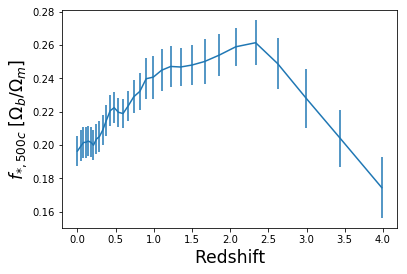

In [104]:
# Test figure for f*500c as a function of redshift

xvals = 1./AGN_aexps - 1.
yvals_all = [ values_at_aexp(AGN_df['halos'], aexp, 'f_star_500c') for aexp in AGN_aexps ]
yvals = [ yval.mean() for yval in yvals_all ]
yvals_err = [ yval.std() for yval in yvals_all ]
plt.errorbar(xvals, [yval/fbaryon(1.) for yval in yvals], yvals_err,label='AGN')
plt.xlabel('Redshift',fontsize='xx-large')
plt.ylabel('$f_{*,500c}$ $[\\Omega_b/\\Omega_m]$',fontsize='xx-large')

In [98]:
# Function to create fbar normalized figures

def plot_fbarnorm_evolution(dfs, field, df_labels, ylabel) :
    for df, df_label in zip(dfs,df_labels) :
        aexps = df['halos'].aexp.unique()
        redshifts = 1./aexps - 1.
        yvals_all = [ values_at_aexp(df['halos'], aexp, field) for aexp in aexps ]
        yvals = [ yval.mean() for yval in yvals_all ]
        yvals_err = [ yval.std() for yval in yvals_all ]
        plt.errorbar(redshifts, [yval/fbaryon(1.) for yval in yvals], yvals_err,label=df_label)
    plt.xlabel('Redshift',fontsize='xx-large')
    plt.ylabel(ylabel,fontsize='xx-large')
    # plt.xscale('log')
    plt.legend()

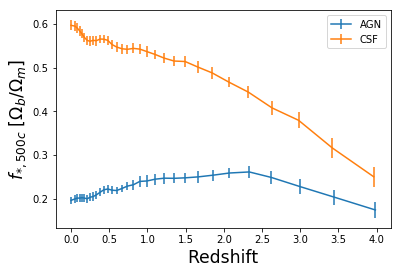

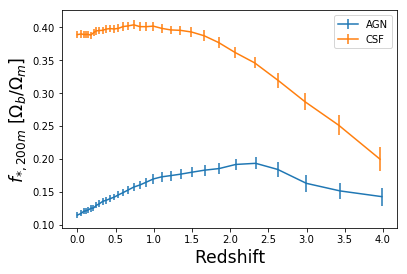

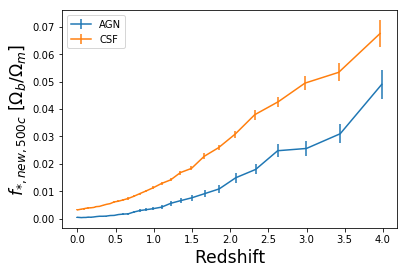

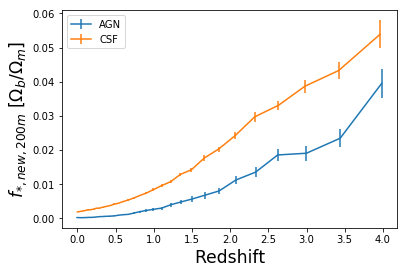

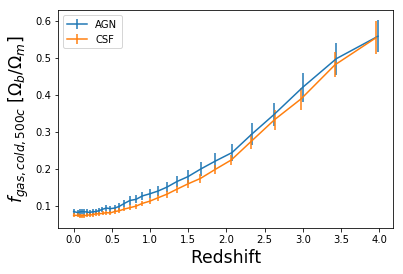

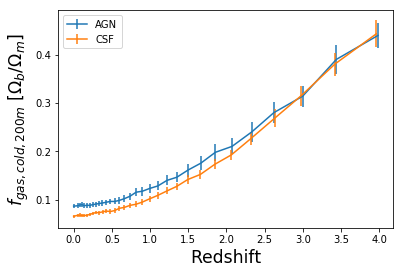

In [99]:
# Let's plot quantities where we can compare AGN and CSF
fields = ['f_star_500c','f_star_200m',
         'f_star_new_500c', 'f_star_new_200m',
         'f_gas_cold_500c', 'f_gas_cold_200m']
labels = ['$f_{*,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{*,200m}$ $[\\Omega_b/\\Omega_m]$',
         '$f_{*,new,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{*,new,200m}$ $[\\Omega_b/\\Omega_m]$',
         '$f_{gas,cold,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{gas,cold,200m}$ $[\\Omega_b/\\Omega_m]$']
for field, label in zip(fields, labels) :
    plot_fbarnorm_evolution([AGN_df,CSF_df], field, ['AGN','CSF'], label)
    plt.show()

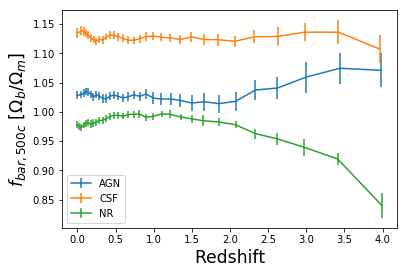

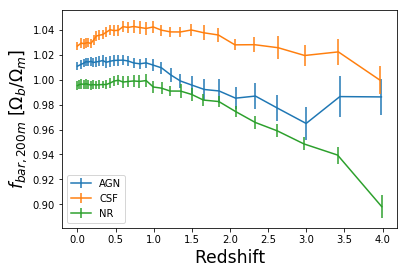

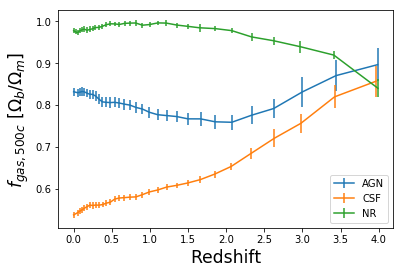

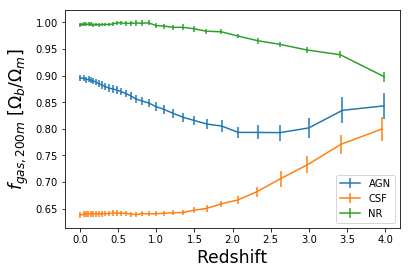

In [100]:
# Let's plot quantities where we can compare AGN, CSF, and NR
fields = ['f_baryon_500c','f_baryon_200m',
         'f_gas_500c', 'f_gas_200m']
labels = ['$f_{bar,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{bar,200m}$ $[\\Omega_b/\\Omega_m]$',
         '$f_{gas,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{gas,200m}$ $[\\Omega_b/\\Omega_m]$']
for field, label in zip(fields, labels) :
    plot_fbarnorm_evolution([AGN_df,CSF_df,NR_df], field, ['AGN','CSF','NR'], label)
    plt.show()